<a href="https://colab.research.google.com/github/MayraSSQ/PrediccionDemandaTransportePublico---Metropolitano---Redes-Neuronales/blob/main/TFM01_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aplicación de Redes Neuronales en la Predicción de la Demanda de Transporte Público en Entornos Urbanos: Caso del Metropolitano de Lima**

# EDA

In [1]:
# INSTALAR LIBRERÍAS NECESARIAS (si no están ya instaladas)
#!pip install matplotlib seaborn pandas statsmodels --quiet

# IMPORTAR LIBRERÍAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# CONFIGURAR ESTILO
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# SUBIR ARCHIVO
from google.colab import files
uploaded = files.upload()

# LEER CSV
df = pd.read_csv(next(iter(uploaded)))

# LIMPIEZA BÁSICA
df['estacion'] = df['estacion'].str.strip().str.lower()
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True, errors='coerce')

# Crear columna de día de semana numérico (lunes=0, domingo=6)
df['dia_semana_num'] = df['fecha'].dt.dayofweek

Saving Datos_final.csv to Datos_final.csv


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   estacion                   40432 non-null  object        
 1   fecha                      40432 non-null  datetime64[ns]
 2   validaciones               40432 non-null  int64         
 3   Dia de Semana              40432 non-null  object        
 4   anio                       40432 non-null  int64         
 5   mes                        40432 non-null  int64         
 6   dia                        40432 non-null  int64         
 7   semana_del_anio            40432 non-null  int64         
 8   es_finde                   40432 non-null  int64         
 9   mes_sin                    40432 non-null  float64       
 10  mes_cos                    40432 non-null  float64       
 11  dia_semana_num             40432 non-null  int32         
 12  dia_

In [4]:
df.describe()

,fecha,validaciones,anio,mes,dia,semana_del_anio,es_finde,mes_sin,mes_cos,dia_semana_num,dia_semana_sin,dia_semana_cos,feriado,vacaciones_escolares,vacaciones_universitarias,eventos
count,40432,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,4.043200e+04,4.043200e+04,40432.000000,4.043200e+04,4.043200e+04,40432.000000,40432.000000,40432.000000,40432.000000
mean,2022-06-16 12:00:00,6481.826153,2021.970865,6.366541,15.712406,25.882519,0.285714,-5.537880e-03,-3.157714e-02,3.000000,-1.570656e-18,1.922131e-19,0.031955,0.284774,0.336466,0.039474
min,2021-01-01 00:00:00,0.000000,2021.000000,1.000000,1.000000,1.000000,0.000000,-1.000000e+00,-1.000000e+00,0.000000,-9.749279e-01,-9.009689e-01,0.000000,0.000000,0.000000,0.000000
25%,2021-09-23 18:00:00,1642.000000,2021.000000,3.000000,8.000000,13.000000,0.000000,-8.660254e-01,-8.660254e-01,1.000000,-7.818315e-01,-9.009689e-01,0.000000,0.000000,0.000000,0.000000
50%,2022-06-16 12:00:00,3563.000000,2022.000000,6.000000,16.000000,26.000000,0.000000,1.220000e-16,-1.840000e-16,3.000000,0.000000e+00,-2.225209e-01,0.000000,0.000000,0.000000,0.000000
75%,2023-03-09 06:00:00,7165.000000,2023.000000,9.000000,23.000000,38.250000,1.000000,8.660254e-01,5.000000e-01,5.000000,7.818315e-01,6.234898e-01,0.000000,1.000000,1.000000,0.000000
max,2023-11-30 00:00:00,92602.000000,2023.000000,12.000000,31.000000,53.000000,1.000000,1.000000e+00,1.000000e+00,6.000000,9.749279e-01,1.000000e+00,1.000000,1.000000,1.000000,1.000000
std,NaN,10498.509954,0.810014,3.366876,8.791872,14.706720,0.451760,7.158457e-01,6.975399e-01,2.000025,7.071155e-01,7.071155e-01,0.175882,0.451313,0.472506,0.194721


In [89]:
# LIMPIEZA PREVIA DE DÍAS DE LA SEMANA
df['Dia de Semana'] = df['Dia de Semana'].str.lower().str.strip()
correccion_dias = {'miercoles': 'miércoles', 'sabado': 'sábado'}
df['Dia de Semana'] = df['Dia de Semana'].replace(correccion_dias)

Valores nulos por columna:
estacion                     0
fecha                        0
validaciones                 0
Dia de Semana                0
anio                         0
mes                          0
dia                          0
semana_del_anio              0
es_finde                     0
mes_sin                      0
mes_cos                      0
dia_semana_num               0
dia_semana_sin               0
dia_semana_cos               0
feriado                      0
vacaciones_escolares         0
vacaciones_universitarias    0
Zona_geografica              0
eventos                      0
tipo_evento                  0
dtype: int64

Registros duplicados: 0


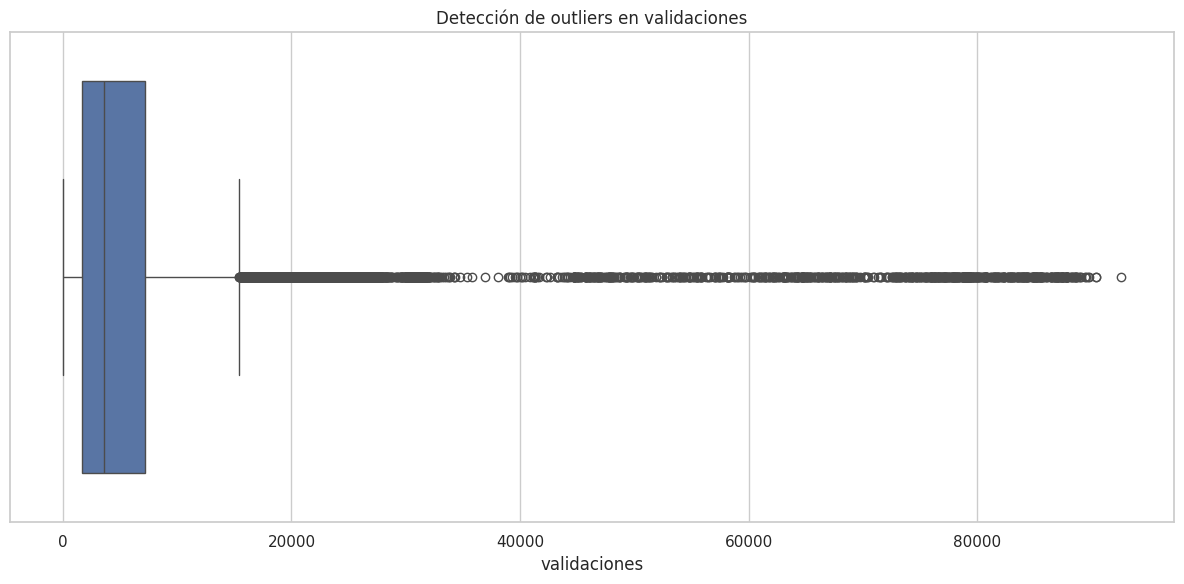

In [90]:
# ====================
# 1. VALORES NULOS
# ====================
print("Valores nulos por columna:")
print(df.isnull().sum())

# ====================
# 2. DUPLICADOS
# ====================
duplicados = df.duplicated().sum()
print(f"\nRegistros duplicados: {duplicados}")

# ====================
# 3. VALORES ATÍPICOS (Outliers en validaciones)
# ====================
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['validaciones'])
plt.title("Detección de outliers en validaciones")
plt.tight_layout()
plt.show()

En esta gráfica podemos observar que, estadísticamente, existen numerosos valores considerados atípicos. Sin embargo, en el contexto operativo del Metropolitano, esta dispersión es esperada debido a las diferencias de demanda entre estaciones de alta y baja afluencia. Por tanto, no se aplicaron correcciones automáticas sobre estos valores altos. El análisis de calidad se enfocó exclusivamente en detectar registros anormalmente bajos —como validaciones menores a 100—, evaluando cada caso según feriados, eventos o fines de semana, con el objetivo de preservar la estructura natural de la serie temporal.

In [91]:
# Filtrar registros con validaciones MUY bajas (menores a 100)
valores_muy_bajos = df[df['validaciones'] < 100]

print(f"Registros con validaciones menores a 100: {len(valores_muy_bajos)}")

# Mostrar los primeros casos
valores_muy_bajos[['fecha', 'estacion', 'validaciones', 'Dia de Semana', 'feriado', 'eventos']]


Registros con validaciones menores a 100: 3386


,fecha,estacion,validaciones,Dia de Semana,feriado,eventos
240,2021-08-29,2 de mayo,0,domingo,0,0
241,2021-08-30,2 de mayo,0,lunes,1,0
242,2021-08-31,2 de mayo,0,martes,0,0
243,2021-09-01,2 de mayo,0,miércoles,0,0
244,2021-09-02,2 de mayo,0,jueves,0,1
...,...,...,...,...,...,...
40307,2023-07-29,uni,0,sábado,1,0
40315,2023-08-06,uni,0,domingo,0,0
40339,2023-08-30,uni,0,miércoles,1,0
40378,2023-10-08,uni,0,domingo,1,0


In [92]:
# Filtrar registros menores a 100 validaciones
valores_pequenos = df[df['validaciones'] < 100]

# Agrupar por estación y valor de validaciones
agrupado_detallado = valores_pequenos.groupby(['estacion', 'validaciones']).agg(
    cantidad=('validaciones', 'count'),
    cantidad_feriados=('feriado', 'sum'),
    cantidad_eventos=('eventos', 'sum'),
    cantidad_fines_de_semana=('Dia de Semana', lambda x: (x.isin(['sábado', 'domingo'])).sum())
).reset_index()

# Mostrar
agrupado_detallado.sort_values(['estacion', 'validaciones'])


,estacion,validaciones,cantidad,cantidad_feriados,cantidad_eventos,cantidad_fines_de_semana
0,2 de mayo,0,87,13,14,27
1,2 de mayo,1,1,0,0,1
2,28 de julio,0,86,13,14,27
3,28 de julio,2,1,0,0,0
4,angamos,0,85,13,14,26
...,...,...,...,...,...,...
94,teran,65,1,0,0,1
95,tomas valle,0,85,13,14,26
96,tomas valle,1,2,0,0,1
97,uni,0,86,13,14,27


In [93]:
# Crear una copia para trabajar
df_imputado = df.copy()

# Filtrar registros con validaciones menores a 100
a_imputar = df_imputado[df_imputado['validaciones'] < 100]

print(f"Registros con validaciones menores a 100 que serán imputados: {len(a_imputar)}")

# Calcular promedio de validaciones por estación y día de semana, considerando días normales (validaciones >= 100)
dias_normales = df_imputado[df_imputado['validaciones'] >= 100]

promedio_por_estacion_dia = dias_normales.groupby(['estacion', 'Dia de Semana'])['validaciones'].mean().reset_index()
promedio_por_estacion_dia.rename(columns={'validaciones': 'promedio_estacion_dia'}, inplace=True)

# Unir el promedio al dataframe original
df_imputado = df_imputado.merge(promedio_por_estacion_dia, on=['estacion', 'Dia de Semana'], how='left')

# Imputar: donde validaciones < 100, poner promedio_estacion_dia
df_imputado['validaciones_final'] = df_imputado.apply(
    lambda row: row['promedio_estacion_dia'] if row['validaciones'] < 100 else row['validaciones'],
    axis=1
)

# Eliminar columnas auxiliares si deseas
df_imputado = df_imputado.drop(columns=['promedio_estacion_dia'])

print("Imputación completada. Ahora tu columna limpia es 'validaciones_final'.")


Registros con validaciones menores a 100 que serán imputados: 3386
Imputación completada. Ahora tu columna limpia es 'validaciones_final'.


Tras analizar el contexto operativo del sistema Metropolitano de Lima y confirmar que no se registraron interrupciones del servicio ni durante feriados ni durante eventos sociales, se decidió imputar todos los registros con validaciones menores a 100. La imputación se realizó utilizando el promedio de validaciones correspondiente a cada estación y día de la semana, calculado a partir de días normales. Esta estrategia garantizó la coherencia y continuidad de las series temporales para su posterior modelado predictivo.

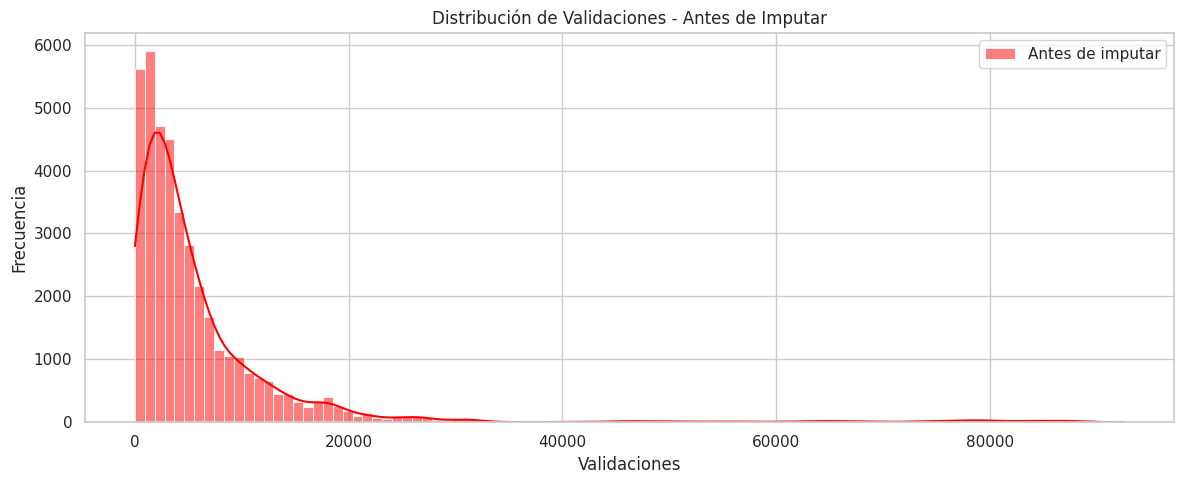

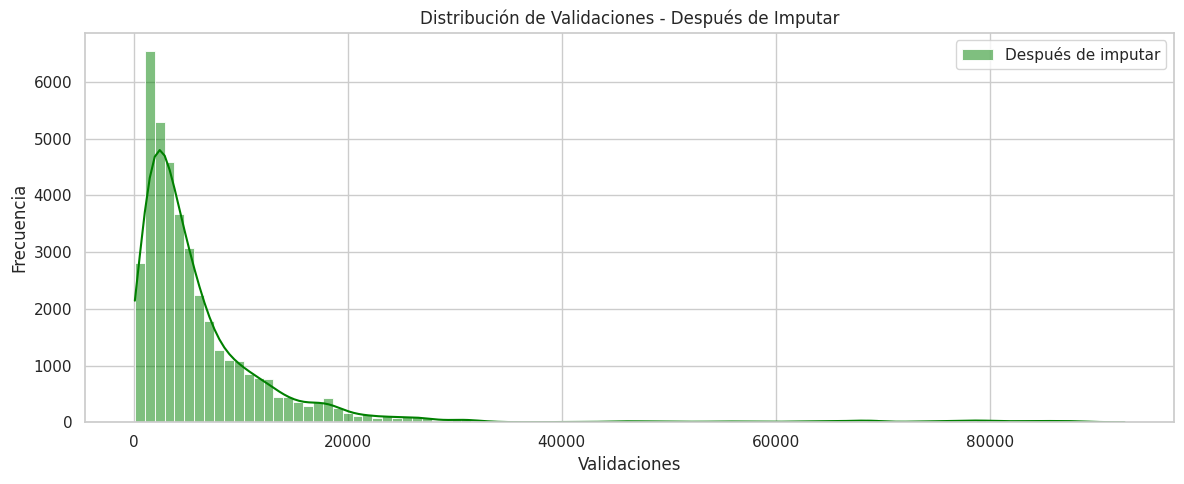

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un dataframe de comparación
comparacion = pd.DataFrame({
    'validaciones_original': df['validaciones'],
    'validaciones_imputadas': df_imputado['validaciones_final']
})

# Histograma de antes
plt.figure(figsize=(12,5))
sns.histplot(comparacion['validaciones_original'], color='red', label='Antes de imputar', bins=100, kde=True)
plt.title('Distribución de Validaciones - Antes de Imputar')
plt.xlabel('Validaciones')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

# Histograma de después
plt.figure(figsize=(12,5))
sns.histplot(comparacion['validaciones_imputadas'], color='green', label='Después de imputar', bins=100, kde=True)
plt.title('Distribución de Validaciones - Después de Imputar')
plt.xlabel('Validaciones')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()


In [95]:
# Verificar si aún hay ceros después de la imputación
ceros_restantes = df_imputado[df_imputado['validaciones_final'] <= 0]

print(f"Registros con validaciones menores a 100 después de imputar: {len(ceros_restantes)}")
ceros_restantes[['fecha', 'estacion', 'Dia de Semana', 'validaciones', 'validaciones_final']]


Registros con validaciones menores a 100 después de imputar: 0


,fecha,estacion,Dia de Semana,validaciones,validaciones_final


Como parte del proceso de limpieza y preparación de datos, se identificaron registros con validaciones anormalmente bajas (menores a 100), lo cual no correspondía a la operación real del sistema Metropolitano de Lima. Estos valores fueron corregidos mediante un proceso de imputación utilizando el promedio de validaciones correspondiente a cada estación y día de la semana.

En la Figura se presenta la distribución de las validaciones antes del proceso de imputación. Se observa una alta concentración de registros en valores extremadamente bajos, incluyendo múltiples ceros, lo cual refleja inconsistencias en los datos que podrían afectar el análisis predictivo posterior.

En la Figura se muestra la distribución de validaciones después de la imputación. Se evidencia una notable mejora en la consistencia de los datos: los valores anómalamente bajos fueron corregidos, y la distribución resultante refleja de manera más fiel la operación real del sistema de transporte, manteniendo la heterogeneidad entre estaciones de alta y baja demanda.

Previo a la realización del análisis exploratorio de datos (EDA), se llevó a cabo un proceso de imputación de registros anómalamente bajos. Esta corrección fue necesaria dado que los valores extremadamente pequeños distorsionaban la visualización y la interpretación de los patrones de demanda. Al imputar estos registros utilizando el promedio por estación y día de la semana, se logró obtener una base de datos consistente que reflejara de manera más precisa la dinámica real del sistema, permitiendo así un análisis exploratorio más confiable.

El análisis exploratorio de datos se realizó utilizando la variable validaciones_final, la cual refleja una base de datos depurada y consistente. Las visualizaciones permitieron identificar tendencias estacionales, variaciones semanales y relaciones relevantes entre eventos especiales y demanda de transporte, proporcionando información clave para el posterior modelado predictivo.

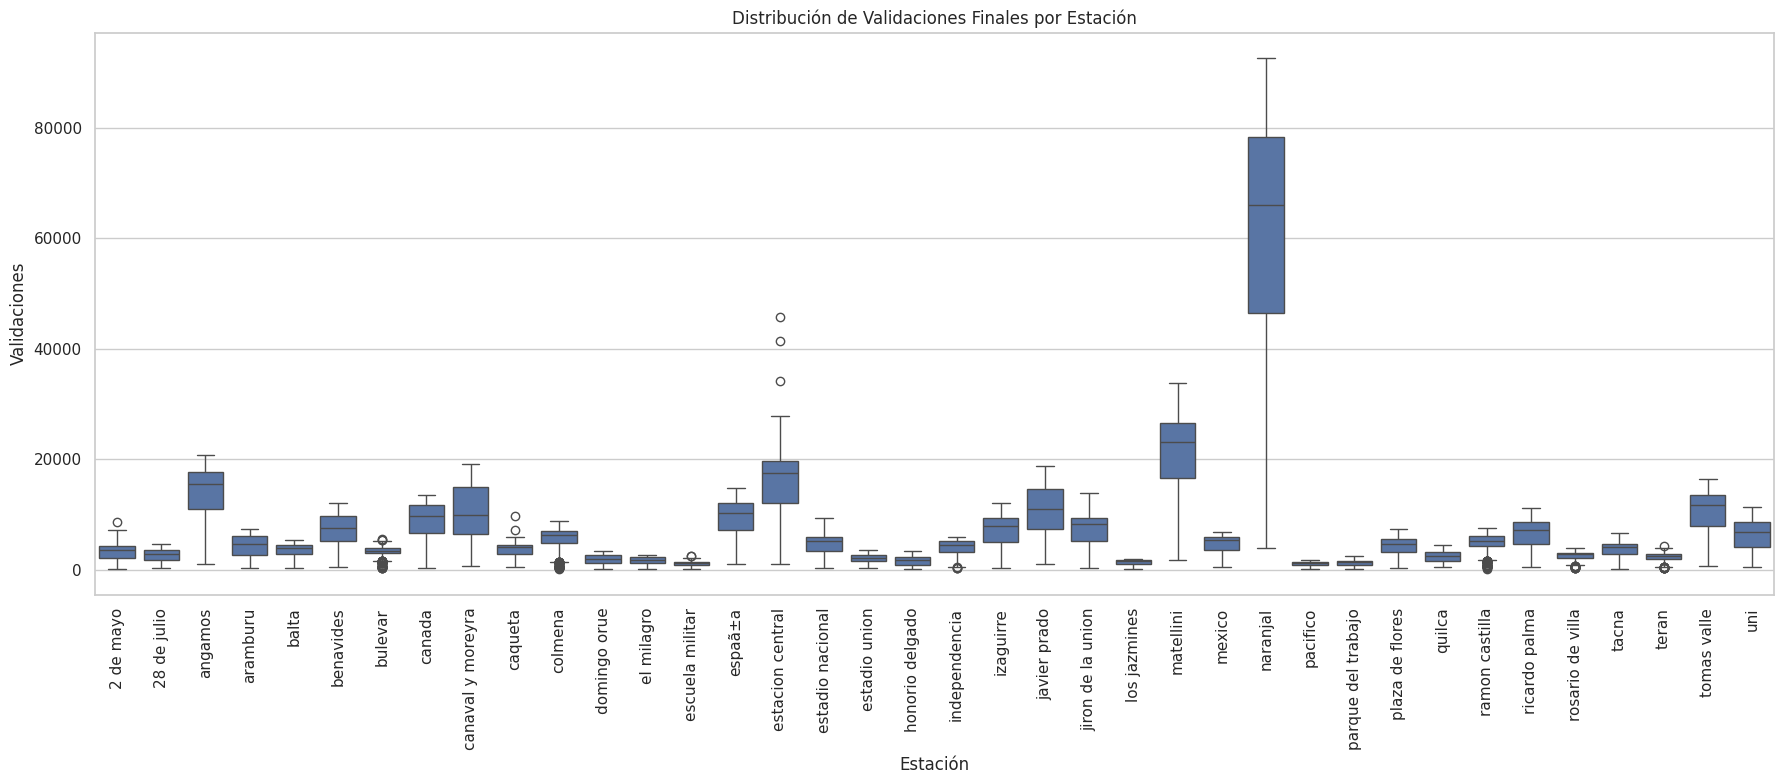

In [96]:
# Boxplot de validaciones por estación
plt.figure(figsize=(18,8))
sns.boxplot(x='estacion', y='validaciones_final', data=df_imputado)
plt.xticks(rotation=90)
plt.title('Distribución de Validaciones Finales por Estación')
plt.xlabel('Estación')
plt.ylabel('Validaciones')
plt.tight_layout()
plt.show()


El análisis de la distribución de validaciones finales por estación (Figura X) revela una fuerte heterogeneidad en los niveles de demanda del sistema Metropolitano de Lima. Se observa que la estación Naranjal concentra los mayores volúmenes de validaciones diarias, seguida por Estación Central y Matellini, lo que confirma su rol como nodos principales de movilidad. En contraste, estaciones como Domingo Orué, Colmena o Tacna presentan volúmenes significativamente menores. La dispersión en estaciones de alta demanda refleja variaciones operativas normales, mientras que la menor dispersión en estaciones pequeñas indica una demanda más estable. La presencia de outliers en algunas estaciones se atribuye a eventos especiales o días excepcionales.

Este gráfico nos muestra claramente la diferencia en los niveles de demanda entre estaciones. Naranjal destaca como el principal nodo de validaciones diarias, seguido por Estación Central y Matellini. Además, vemos que muchas estaciones más pequeñas tienen un patrón mucho más estable, lo cual refleja la estructura operativa jerárquica del Metropolitano.

In [97]:
# Primero, filtramos solo la estación que quieres analizar (por ejemplo, "bulevar")
estacion_bulevar = df_imputado[df_imputado['estacion'].str.contains('bulevar', case=False)]

# Segundo, vemos la distribución para detectar posibles outliers
Q1 = estacion_bulevar['validaciones_final'].quantile(0.25)
Q3 = estacion_bulevar['validaciones_final'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites de outliers (regla de 1.5*IQR)
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Límites para considerar outliers en Bulevar: {limite_inferior:.2f} a {limite_superior:.2f}")

# Tercero, identificar registros que son outliers
outliers_bulevar = estacion_bulevar[
    (estacion_bulevar['validaciones_final'] < limite_inferior) |
    (estacion_bulevar['validaciones_final'] > limite_superior)
]

# Mostrar los outliers encontrados
outliers_bulevar[['fecha', 'validaciones_final', 'Dia de Semana']]


Límites para considerar outliers en Bulevar: 1527.12 a 5212.12


,fecha,validaciones_final,Dia de Semana
6414,2021-01-31,396.0,domingo
6415,2021-02-01,1128.0,lunes
6416,2021-02-02,1187.0,martes
6417,2021-02-03,1182.0,miércoles
6418,2021-02-04,1222.0,jueves
6419,2021-02-05,1286.0,viernes
6420,2021-02-06,1218.0,sábado
6421,2021-02-07,433.0,domingo
6422,2021-02-08,1308.0,lunes
6423,2021-02-09,1295.0,martes


Al analizar los valores atípicos en la estación Bulevar, se identificaron registros de validaciones finales menores a 1527 durante los primeros meses de 2021. Estos valores bajos fueron evaluados en su contexto temporal, observándose que correspondían a la fase inicial de recuperación de la demanda tras restricciones de movilidad. Por lo tanto, dichos registros fueron considerados como representativos del comportamiento real del sistema y se conservaron en la base de datos para mantener la fidelidad de la serie temporal.

Al analizar los valores atípicos en la estación Bulevar, se identificaron registros con validaciones finales menores a 1527, considerados outliers bajos. Estos registros corresponden a días específicos donde la demanda fue anormalmente reducida, posiblemente por efectos de restricciones de movilidad, feriados o menor actividad general. No se detectaron outliers altos en esta estación, indicando una operación relativamente estable en términos de demanda elevada.

como guión: En estaciones como Bulevar, los valores considerados outliers bajos fueron revisados en su contexto temporal. Se determinó que correspondían a una etapa de recuperación gradual de la demanda, por lo que se decidió conservarlos para no alterar la estructura real de los datos.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

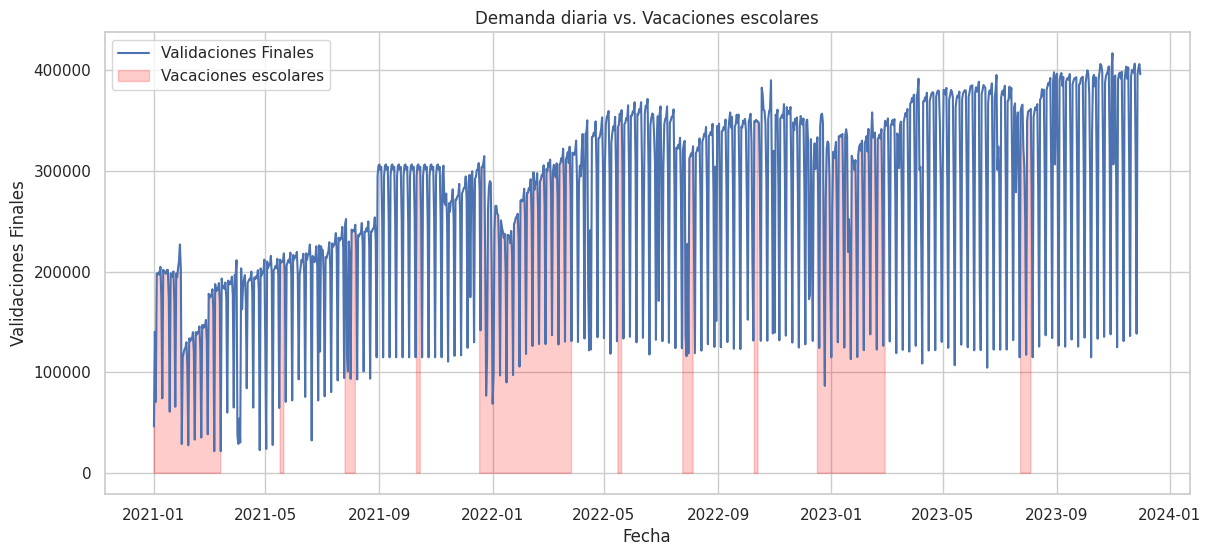

In [98]:
# Agrupar por fecha: suma de validaciones y si fue día de vacaciones escolares
serie_diaria = df_imputado.groupby('fecha').agg({
    'validaciones_final': 'sum',
    'vacaciones_escolares': 'max'
}).reset_index()

# Graficar: línea de demanda + sombra para vacaciones escolares
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.lineplot(data=serie_diaria, x='fecha', y='validaciones_final', label='Validaciones Finales')
plt.fill_between(
    x=serie_diaria['fecha'],
    y1=0,
    y2=serie_diaria['validaciones_final'],
    where=serie_diaria['vacaciones_escolares'] == 1,
    color='red',
    alpha=0.2,
    label='Vacaciones escolares'
)
plt.title('Demanda diaria vs. Vacaciones escolares')
plt.xlabel('Fecha')
plt.ylabel('Validaciones Finales')
plt.legend()
plt.grid(True)
plt



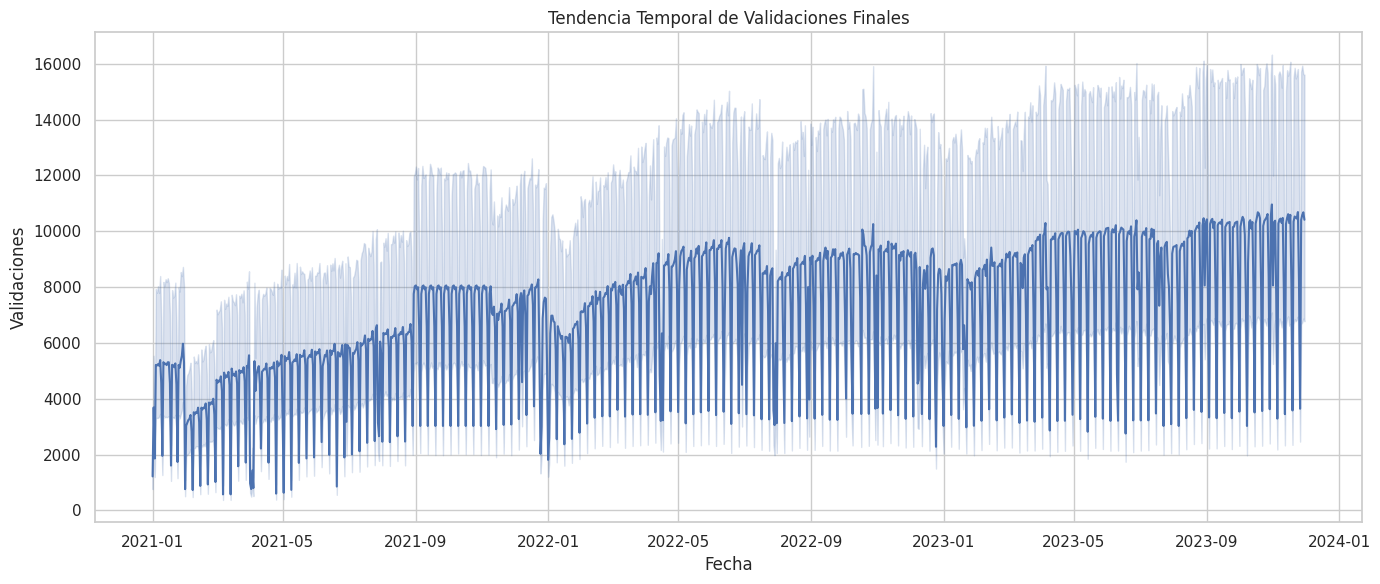

In [99]:
# Análisis temporal de la demanda

df_imputado_sorted = df_imputado.sort_values('fecha')

plt.figure(figsize=(14,6))
sns.lineplot(x='fecha', y='validaciones_final', data=df_imputado_sorted)
plt.title('Tendencia Temporal de Validaciones Finales')
plt.xlabel('Fecha')
plt.ylabel('Validaciones')
plt.tight_layout()
plt.show()


El análisis temporal de las validaciones finales muestra una clara tendencia de crecimiento en la demanda de transporte público desde inicios de 2021 hasta finales de 2023. Esta recuperación progresiva refleja el retorno de las actividades presenciales tras las restricciones impuestas por la pandemia. Se identifica además un patrón cíclico semanal, con mayor número de validaciones en días laborables y caídas en fines de semana. Variaciones estacionales adicionales, como descensos durante periodos de vacaciones escolares, también son evidentes en la serie.

guión: Este gráfico de series temporales muestra cómo la demanda de transporte ha crecido de manera sostenida desde 2021, con patrones semanales claramente marcados entre días hábiles y fines de semana. También podemos identificar descensos estacionales que corresponden a vacaciones escolares o eventos especiales.

<ipython-input-100-8ac7459e1b59>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-100-8ac7459e1b59>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


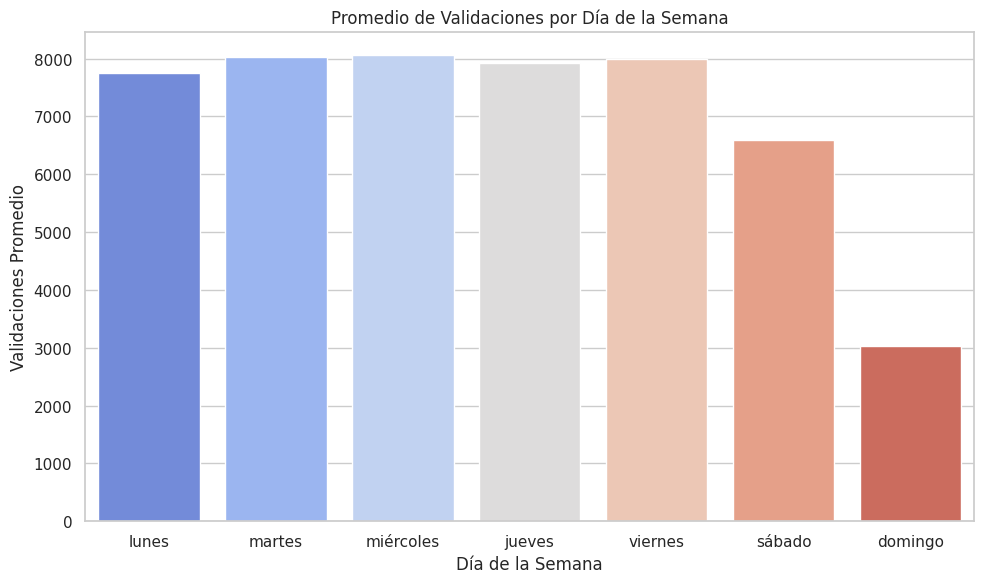

In [100]:
#Promedio de validaciones por día de la semana

import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que los días estén en orden correcto
dias_orden = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']

# Crear gráfico de promedio de validaciones por día de la semana
plt.figure(figsize=(10,6))
sns.barplot(
    x='Dia de Semana',
    y='validaciones_final',
    data=df_imputado,
    order=dias_orden,
    estimator='mean',
    ci=None,
    palette='coolwarm'
)
plt.title('Promedio de Validaciones por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Validaciones Promedio')
plt.tight_layout()
plt.show()


El análisis del promedio de validaciones por día de la semana revela un patrón consistente con el comportamiento típico de sistemas de transporte urbano. De lunes a viernes, la demanda se mantiene elevada y relativamente estable, asociada a actividades laborales y académicas. Los sábados presentan una disminución moderada en el volumen de validaciones, reflejando una reducción parcial de la actividad. En contraste, los domingos muestran la menor cantidad de validaciones promedio, coherente con la reducción generalizada de la movilidad urbana durante los días de descanso.

guión: El comportamiento semanal muestra que de lunes a viernes se mantiene un nivel alto de validaciones, asociado a actividades laborales y académicas. Los sábados la demanda baja moderadamente y los domingos se reduce significativamente, siguiendo un patrón de movilidad urbana típico.

<ipython-input-101-38226a7aa1c1>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mes', y='validaciones_final', data=df_imputado, ci=None, estimator='mean', palette='viridis')
<ipython-input-101-38226a7aa1c1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes', y='validaciones_final', data=df_imputado, ci=None, estimator='mean', palette='viridis')


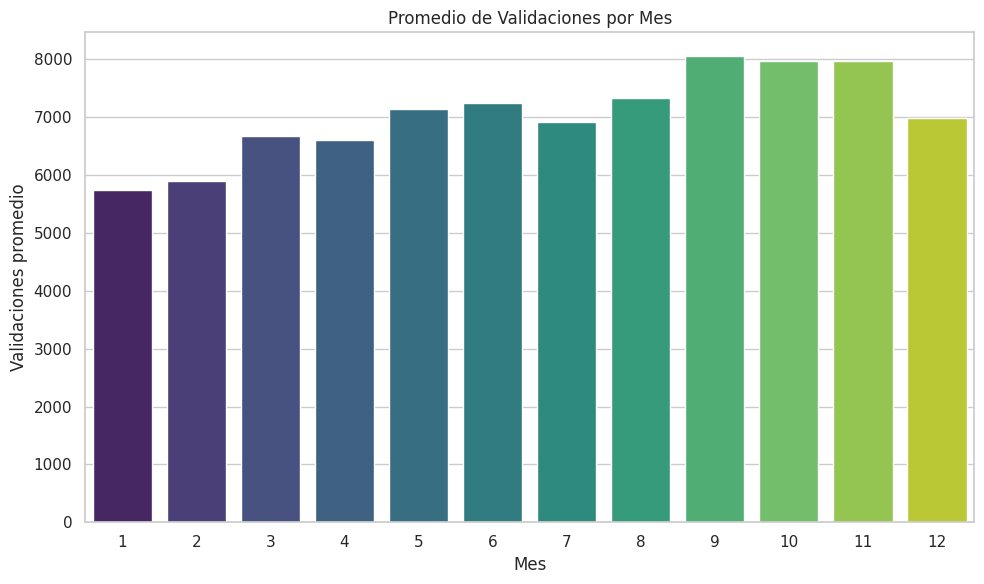

In [101]:
#Promedio de validaciones por mes

df_imputado['mes'] = df_imputado['fecha'].dt.month

plt.figure(figsize=(10,6))
sns.barplot(x='mes', y='validaciones_final', data=df_imputado, ci=None, estimator='mean', palette='viridis')
plt.title('Promedio de Validaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Validaciones promedio')
plt.tight_layout()
plt.show()

La figura muestra la distribución promedio mensual de validaciones durante el periodo analizado. Se evidencia una menor demanda durante los meses de enero y diciembre, en concordancia con las vacaciones escolares y las festividades de fin de año. Asimismo, julio presenta una ligera caída asociada al receso de medio año. El resto del año mantiene niveles elevados de validaciones, indicando una operación constante del sistema en periodos regulares de actividad académica y laboral.

guión: El análisis estacional muestra que la demanda cae en enero, julio y diciembre, lo cual coincide con los ciclos escolares y festivos. En los demás meses, el sistema mantiene una operación estable, reflejando una actividad urbana regular.

In [102]:
# Eliminar columna original
df_imputado = df_imputado.drop(columns=['validaciones'])

<ipython-input-103-992db5a12e12>:11: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


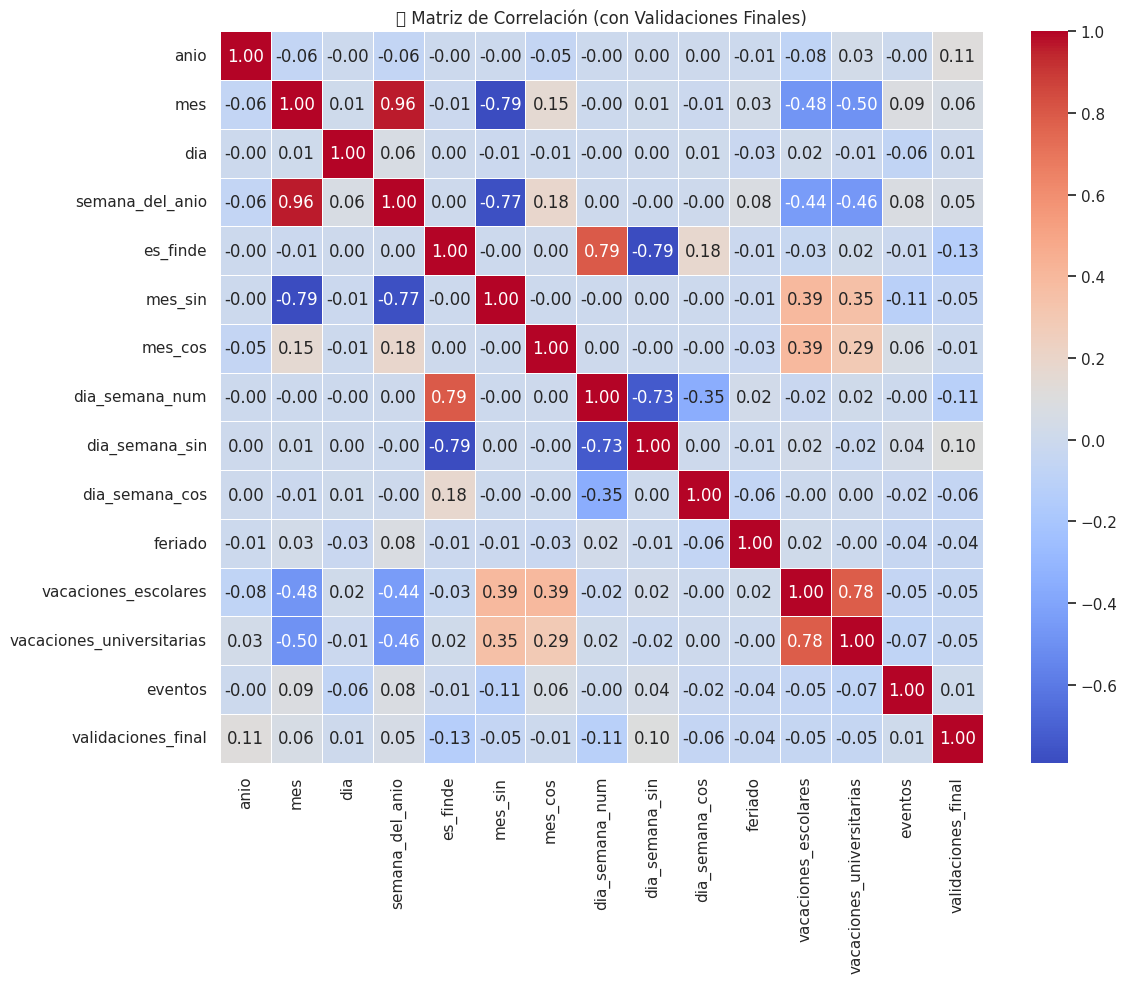

In [103]:
# Filtrar solo variables numéricas incluyendo validaciones_final
variables_numericas = df_imputado.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_corr = variables_numericas.corr()

# Visualizar
plt.figure(figsize=(12,10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('🔗 Matriz de Correlación (con Validaciones Finales)')
plt.tight_layout()
plt.show()


El análisis de la matriz de correlación evidencia relaciones débiles entre la variable objetivo (validaciones_final) y factores contextuales como feriados, eventos y periodos de vacaciones escolares o universitarias. Esta baja correlación numérica se explica por la baja frecuencia de estos eventos en comparación al volumen total de días analizados. Sin embargo, las visualizaciones temporales complementarias confirmaron el impacto de dichos factores en la demanda diaria. Además, se observó una alta correlación entre vacaciones_escolares y vacaciones_universitarias, indicando la posible coincidencia de periodos de receso académico. Por último, las variables temporales (mes, semana_del_año, mes_sin, mes_cos) mostraron correlaciones esperadas debido a su naturaleza cíclica, justificando su inclusión como codificaciones en el modelo de predicción.

guión: En la matriz de correlación, aunque las variables de vacaciones y feriados presentan correlaciones numéricas bajas con la demanda, los gráficos temporales muestran caídas claras en estos periodos. Por eso, decidimos conservar estas variables en el modelo. También observamos que las variables de codificación temporal están correlacionadas entre sí, lo cual es esperado por la naturaleza cíclica del tiempo, y se manejó mediante técnicas adecuadas como codificación sinusoidal.

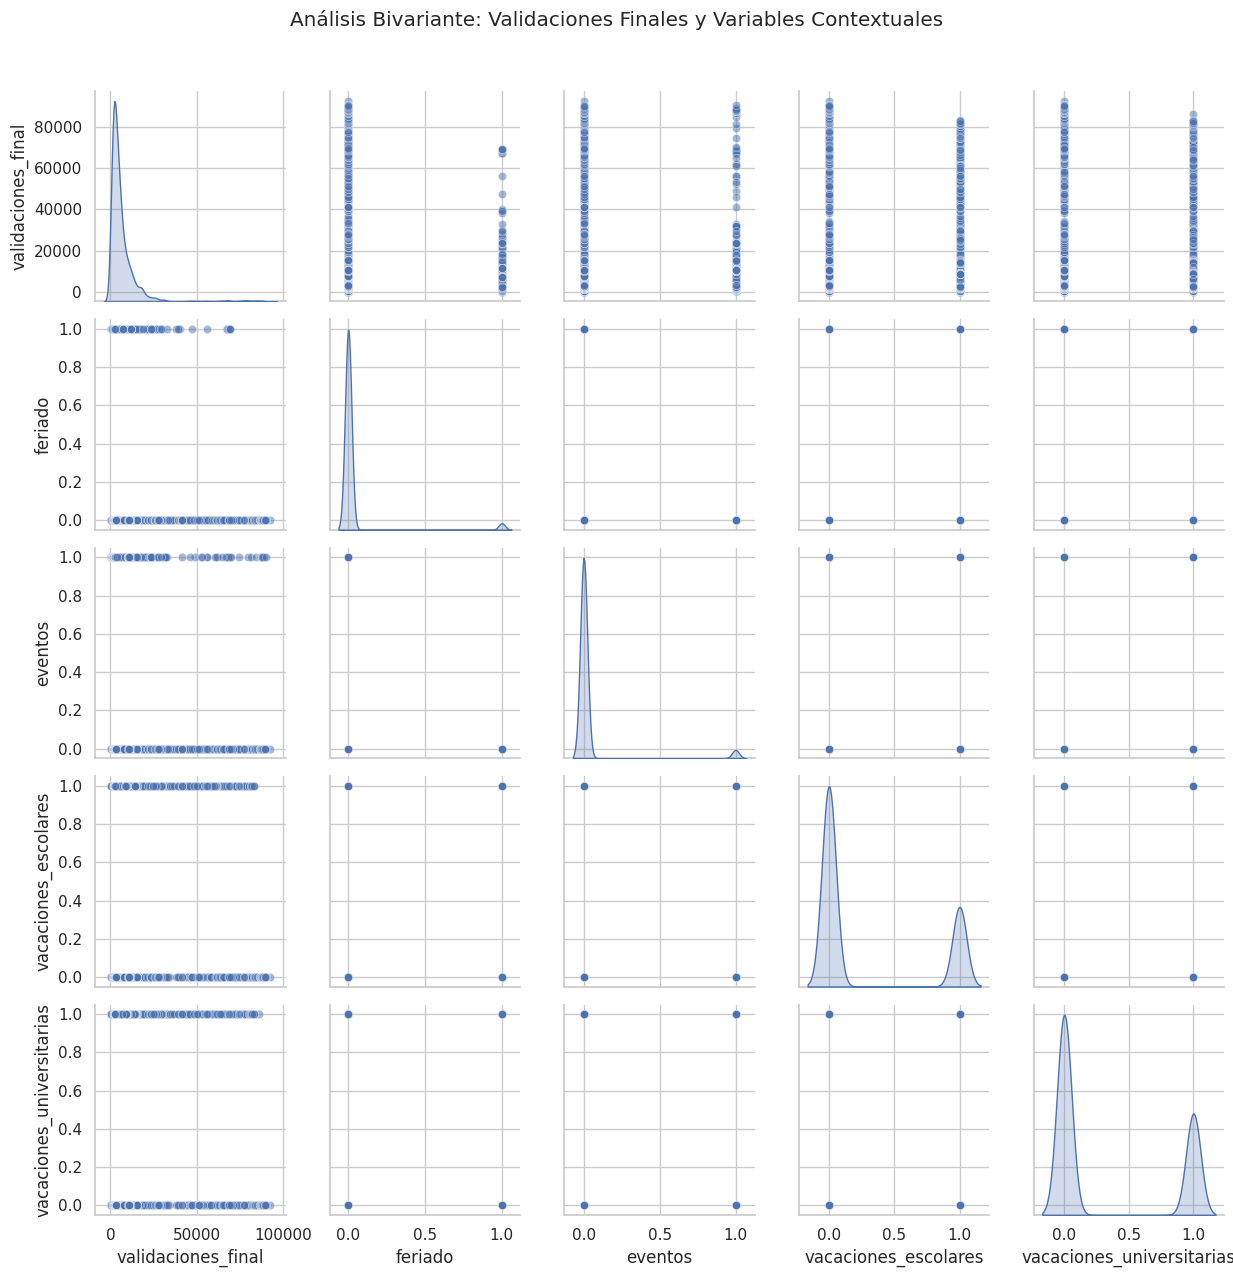

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las variables relevantes
subset = df_imputado[[
    'validaciones_final',
    'feriado',
    'eventos',
    'vacaciones_escolares',
    'vacaciones_universitarias'
]]

# Crear matriz de gráficos de dispersión
sns.pairplot(subset, kind='scatter', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Análisis Bivariante: Validaciones Finales y Variables Contextuales', y=1.02)
plt.tight_layout()
plt.show()


El análisis bivariante mediante gráficos de dispersión mostró agrupamientos característicos en días feriados y periodos de vacaciones, donde las validaciones tienden a concentrarse en valores más bajos. Aunque estas variables son binarias, el patrón de disminución en la demanda es visualmente evidente, lo que valida su inclusión en el modelo. En contraste, los eventos presentan una dispersión mayor, lo que sugiere un impacto localizado o variable.

guión: El análisis bivariante mediante gráficos de dispersión mostró agrupamientos característicos en días feriados y periodos de vacaciones, donde las validaciones tienden a concentrarse en valores más bajos. Aunque estas variables son binarias, el patrón de disminución en la demanda es visualmente evidente, lo que valida su inclusión en el modelo. En contraste, los eventos presentan una dispersión mayor, lo que sugiere un impacto localizado o variable.

Aunque la variable eventos no muestra una relación clara ni sistemática con la demanda general, se decidió mantenerla en el conjunto de predictores por su posible impacto localizado en ciertos días o estaciones. Los modelos de redes neuronales utilizados son capaces de identificar patrones útiles incluso en variables con alta dispersión, descartando su influencia si no resulta significativa.

guión: La variable de eventos fue incluida con precaución. Aunque no presenta un patrón claro en toda la red, decidí conservarla porque algunos eventos específicos sí podrían alterar la demanda, y las redes neuronales que usé son capaces de gestionar este tipo de variables contextuales sin que afecten negativamente al modelo.


# Preprocesamiento

In [105]:
# Fijar la semilla aleatoria
import numpy as np, tensorflow as tf, random, os
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

In [106]:
# Limpieza adicional - columnas que no usaremos en el análisis.
df_imputado = df_imputado.drop(columns=['tipo_evento', 'Zona_geografica'], errors='ignore')
df_imputado = df_imputado.sort_values('fecha')

In [107]:
# Codificar la variable estacion (One-Hot Encoding)
df_original = df_imputado.copy()

df_imputado = pd.get_dummies(df_imputado, columns=['estacion'], prefix='est')

In [108]:
# Crear variable objetivo futura (t+1)
df_imputado['target_t1'] = df_imputado['validaciones_final'].shift(-1)
# Eliminar registros con target_t1 NULO
df_imputado = df_imputado.dropna(subset=['target_t1'])

Para la predicción de un horizonte t+1 se generó la variable target_t1 mediante un desplazamiento hacia el futuro de un día. Esta técnica conserva la secuencia temporal intacta, lo cual es imprescindible en modelos de redes neuronales recurrentes como LSTM, GRU y RNN. No se aplicaron transformaciones por grupo (por estación). Esta decisión responde a la naturaleza multivariada del enfoque adoptado, en el que se entrena un único modelo con datos de todas las estaciones combinadas. La variable estacion fue incorporada al modelo mediante codificación categórica (One-Hot), lo que permite que la red neuronal identifique y aprenda patrones específicos para cada estación sin necesidad de segmentar las series. Agrupar por estación antes del desplazamiento habría fragmentado la secuencia temporal global, afectando la capacidad del modelo para aprender la dinámica general del sistema de transporte.

In [109]:
# Dividir en Train / Validation / Test
df_imputado['año'] = df_imputado['fecha'].dt.year
train_df = df_imputado[df_imputado['fecha'] < '2023-01-01'].copy()
val_df   = df_imputado[(df_imputado['fecha'] >= '2023-01-01') & (df_imputado['fecha'] < '2023-10-01')].copy()
test_df  = df_imputado[df_imputado['fecha'] >= '2023-10-01'].copy()

In [110]:
# Crear el escalador y ajustarlo SOLO con el entrenamiento
from sklearn.preprocessing import MinMaxScaler
escalar_cols = ['validaciones_final', 'mes_sin', 'mes_cos', 'dia_semana_sin', 'dia_semana_cos']
scaler = MinMaxScaler()
scaler.fit(train_df[escalar_cols])  # aprende el rango solo con entrenamiento

# Aplicar transformaciones (sin volver a aprender)
train_df[escalar_cols] = scaler.transform(train_df[escalar_cols])
val_df[escalar_cols]   = scaler.transform(val_df[escalar_cols])
test_df[escalar_cols]  = scaler.transform(test_df[escalar_cols])

Solo se usa fit() con el entrenamiento para no introducir fuga de datos. Luego transform() aplica la misma lógica a los datos futuros, manteniendo la coherencia."

Se aplicó una serie de transformaciones al conjunto de datos imputado (df_imputado) para adecuarlo al entrenamiento de modelos predictivos. Esto incluyó la fijación de una semilla aleatoria para garantizar la reproducibilidad, la codificación de la variable categórica estacion mediante One-Hot Encoding, el escalado de variables numéricas, la generación de la variable objetivo desplazada (t+1), y la división cronológica en entrenamiento, validación y prueba.

In [111]:
# Eliminar columnas no numéricas (object y datetime)
#train_df = train_df.drop(columns=train_df.select_dtypes(include=['object', 'datetime']).columns)
#val_df = val_df.drop(columns=val_df.select_dtypes(include=['object', 'datetime']).columns)
#test_df = test_df.drop(columns=test_df.select_dtypes(include=['object', 'datetime']).columns)

In [112]:
#train_df = train_df.astype('float32')
#val_df = val_df.astype('float32')
#test_df = test_df.astype('float32')

# Modelado

## PARTE A: MODELO ARIMA POR ESTACIÓN (clásico, baseline)

In [53]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Normaliza nombre de estaciones
df_original['estacion'] = df_original['estacion'].str.strip().str.lower()

# Lista para guardar resultados
resultados_arima = []

# Recorrer cada estación
for est in df_original['estacion'].unique():
    df_est = df_original[df_original['estacion'] == est].sort_values('fecha')

    train = df_est[df_est['fecha'] < '2023-01-01']['validaciones_final']
    test = df_est[df_est['fecha'] >= '2023-01-01']['validaciones_final']

    try:
        model = ARIMA(train, order=(2, 1, 2))
        model_fit = model.fit()
        pred = model_fit.forecast(steps=len(test))

        mae = mean_absolute_error(test, pred)
        rmse = np.sqrt(mean_squared_error(test, pred))

        resultados_arima.append({
            'estacion': est,
            'MAE': mae,
            'RMSE': rmse
        })
    except:
        print(f"Error en estación: {est}")
        continue

# Convertir resultados a DataFrame
df_result_arima = pd.DataFrame(resultados_arima)
df_result_arima


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes o

,estacion,MAE,RMSE
0,2 de mayo,1386.863513,1564.106989
1,benavides,2975.433714,3290.082203
2,naranjal,19218.055282,22113.994085
3,uni,2653.404068,2944.804144
4,pacifico,269.981800,320.844823
5,balta,800.652248,870.372307
6,parque del trabajo,344.203080,391.111340
7,plaza de flores,1721.421025,1938.081503
8,quilca,872.041952,960.579953
9,aramburu,2058.933268,2153.772926


Los resultados de ARIMA mostraron un rendimiento razonable en estaciones con baja variabilidad de demanda, como 'Pacífico' o 'Escuela Militar'. Sin embargo, en estaciones de alta afluencia como 'Naranjal' o 'Estación Central', los errores fueron significativamente más altos, evidenciando la limitada capacidad de ARIMA para adaptarse a dinámicas no lineales. Esto motiva la exploración de modelos de redes neuronales, capaces de capturar patrones temporales más complejos.

<ipython-input-54-19e9b06ee521>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='estacion', data=df_comparativo, palette='coolwarm')


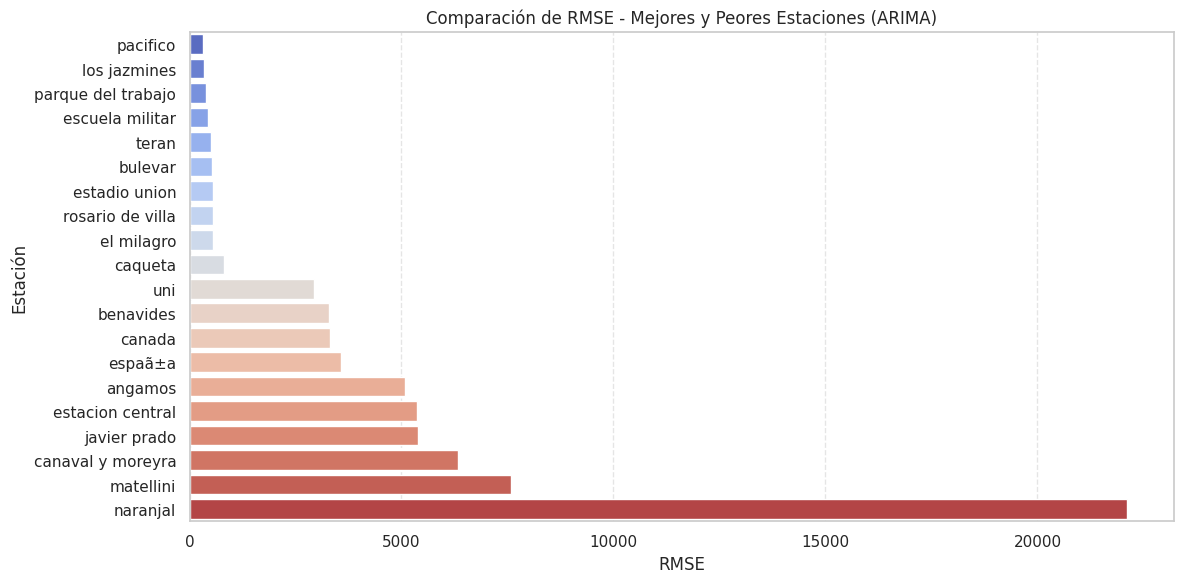

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegúrate de tener df_result_arima con columnas 'estacion' y 'RMSE'

# Ordenar por RMSE
df_result_arima_sorted = df_result_arima.sort_values(by='RMSE', ascending=True)

# Seleccionar top y bottom
top_10 = df_result_arima_sorted.head(10)
bottom_10 = df_result_arima_sorted.tail(10)

# Unir ambos para graficar
df_comparativo = pd.concat([top_10, bottom_10])

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x='RMSE', y='estacion', data=df_comparativo, palette='coolwarm')
plt.title('Comparación de RMSE - Mejores y Peores Estaciones (ARIMA)')
plt.xlabel('RMSE')
plt.ylabel('Estación')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


El análisis de error por estación reveló una gran disparidad en el rendimiento del modelo ARIMA. Mientras que estaciones de menor demanda mostraron errores reducidos (ej. Pacífico con RMSE ≈ 320), estaciones de alta afluencia como Naranjal registraron errores superiores a 20,000 validaciones diarias. Esto refuerza la necesidad de modelos más complejos que puedan capturar patrones no lineales, como las redes neuronales LSTM, GRU o RNN

<ipython-input-55-bccfb947190e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='estacion', data=df_comparativo_mae, palette='crest')


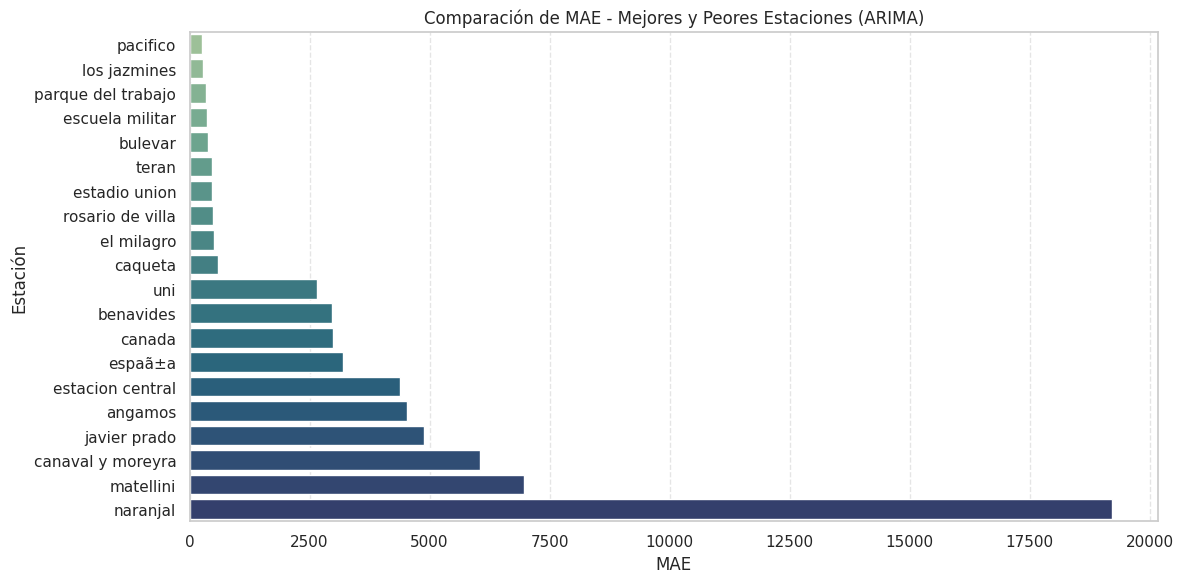

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegúrate de tener cargado el DataFrame df_result_arima con las columnas 'estacion' y 'MAE'

# Ordenar por MAE
df_result_arima_sorted_mae = df_result_arima.sort_values(by='MAE', ascending=True)

# Seleccionar top y bottom
top_10_mae = df_result_arima_sorted_mae.head(10)
bottom_10_mae = df_result_arima_sorted_mae.tail(10)

# Unir ambos en un solo DataFrame
df_comparativo_mae = pd.concat([top_10_mae, bottom_10_mae])

# Gráfico de barras horizontal
plt.figure(figsize=(12, 6))
sns.barplot(x='MAE', y='estacion', data=df_comparativo_mae, palette='crest')
plt.title('Comparación de MAE - Mejores y Peores Estaciones (ARIMA)')
plt.xlabel('MAE')
plt.ylabel('Estación')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Se observó que el modelo ARIMA presentó un desempeño aceptable en estaciones con menor variabilidad, alcanzando un MAE inferior a 500 validaciones diarias. Sin embargo, en estaciones de alta demanda como Naranjal, el MAE superó los 19,000, lo que demuestra que el modelo no logra capturar adecuadamente sus patrones complejos. Esto refuerza la necesidad de modelos más sofisticados, como redes neuronales.

## PARTE B: MODELOS RNN, LSTM, GRU (redes neuronales)

In [113]:
# =============================
# 🧩 Función para crear ventanas de tiempo
# =============================
def crear_ventanas(df, n_lags, target_col):
    X, y = [], []
    features = df.drop(columns=[target_col]).values
    target = df[target_col].values
    for i in range(n_lags, len(df)):
        X.append(features[i - n_lags:i])
        y.append(target[i])
    return np.array(X), np.array(y)

# Convertir columnas booleanas a int
for df in [train_df, val_df, test_df]:
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype('int32')

# Guardar fechas antes de eliminar columnas no numéricas
fechas_test = test_df['fecha'].reset_index(drop=True)

# Eliminar columnas no numéricas (object y datetime)
for df in [train_df, val_df, test_df]:
    df.drop(columns=df.select_dtypes(include=['object', 'datetime']).columns, inplace=True)

# Verificar tipos finales
print("🚨 Tipos después de limpieza:")
print(train_df.dtypes)

# Crear ventanas
n_lags = 7  # ventana de 7 días
X_train, y_train = crear_ventanas(train_df, n_lags, 'target_t1')
X_val, y_val     = crear_ventanas(val_df, n_lags, 'target_t1')
X_test, y_test   = crear_ventanas(test_df, n_lags, 'target_t1')

# =============================
# 🔁 Definir modelos LSTM, GRU, RNN con EarlyStopping
# =============================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def construir_modelo_lstm(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(64))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

def construir_modelo_gru(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(GRU(64))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

def construir_modelo_rnn(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(SimpleRNN(64))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

# =============================
# 📈 Entrenar y evaluar modelos con EarlyStopping
# =============================
def entrenar_y_evaluar(model_func, X_train, y_train, X_val, y_val, X_test, y_test, nombre):
    model = model_func(X_train.shape[1:])
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=50, batch_size=32, callbacks=[early_stop], verbose=0)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print(f"{nombre} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    return model

# Ejecutar comparaciones
modelo_lstm = entrenar_y_evaluar(construir_modelo_lstm, X_train, y_train, X_val, y_val, X_test, y_test, "LSTM")
modelo_gru  = entrenar_y_evaluar(construir_modelo_gru, X_train, y_train, X_val, y_val, X_test, y_test, "GRU")
modelo_rnn  = entrenar_y_evaluar(construir_modelo_rnn, X_train, y_train, X_val, y_val, X_test, y_test, "RNN")


🚨 Tipos después de limpieza:
anio                           int64
mes                            int32
dia                            int64
semana_del_anio                int64
es_finde                       int64
mes_sin                      float64
mes_cos                      float64
dia_semana_num                 int32
dia_semana_sin               float64
dia_semana_cos               float64
feriado                        int64
vacaciones_escolares           int64
vacaciones_universitarias      int64
eventos                        int64
validaciones_final           float64
est_2 de mayo                  int32
est_28 de julio                int32
est_angamos                    int32
est_aramburu                   int32
est_balta                      int32
est_benavides                  int32
est_bulevar                    int32
est_canada                     int32
est_canaval y moreyra          int32
est_caqueta                    int32
est_colmena                    int32
est_domin

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<ipython-input-115-419db591048d>:16: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


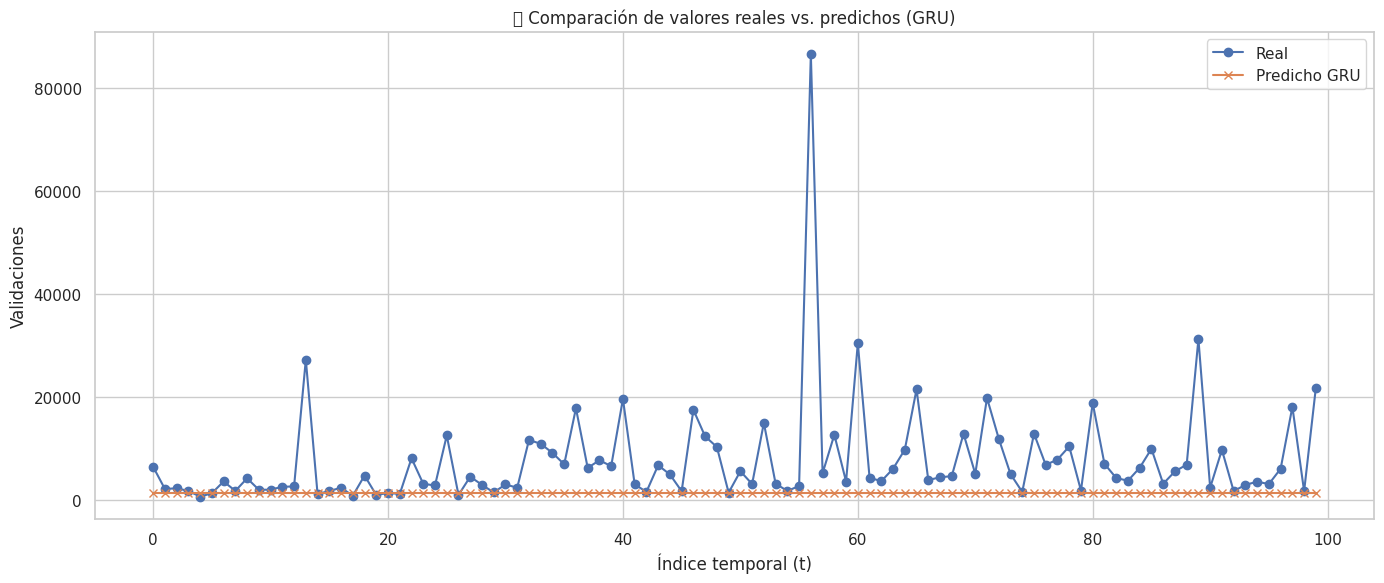

In [115]:
import matplotlib.pyplot as plt

# Asegúrate de haber predicho previamente
pred_gru = modelo_gru.predict(X_test)

# Visualizar 100 puntos (puedes cambiar ese valor)
n = 100
plt.figure(figsize=(14, 6))
plt.plot(y_test[:n], label='Real', marker='o')
plt.plot(pred_gru[:n], label='Predicho GRU', marker='x')
plt.title("🔎 Comparación de valores reales vs. predichos (GRU)")
plt.xlabel("Índice temporal (t)")
plt.ylabel("Validaciones")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [119]:
# =============================
# Escalar el target (solo con train)
# =============================
scaler_target = MinMaxScaler()
train_df['target_t1_scaled'] = scaler_target.fit_transform(train_df[['target_t1']])
val_df['target_t1_scaled']   = scaler_target.transform(val_df[['target_t1']])
test_df['target_t1_scaled']  = scaler_target.transform(test_df[['target_t1']])

# =============================
# Función para crear ventanas de tiempo
# =============================
def crear_ventanas(df, n_lags, target_col):
    X, y = [], []
    features = df.drop(columns=[target_col]).values
    target = df[target_col].values
    for i in range(n_lags, len(df)):
        X.append(features[i - n_lags:i])
        y.append(target[i])
    return np.array(X), np.array(y)

# Crear ventanas
n_lags = 7  # ventana de 7 días
X_train, y_train = crear_ventanas(train_df, n_lags, 'target_t1_scaled')
X_val, y_val     = crear_ventanas(val_df, n_lags, 'target_t1_scaled')
X_test, y_test   = crear_ventanas(test_df, n_lags, 'target_t1_scaled')

# =============================
# 🔁 Definir modelos LSTM, GRU, RNN con EarlyStopping
# =============================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def construir_modelo_lstm(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(64))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

def construir_modelo_gru(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(GRU(64))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

def construir_modelo_rnn(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(SimpleRNN(64))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

# =============================
# 📈 Entrenar y evaluar modelos con EarlyStopping y desescalado
# =============================
def entrenar_y_evaluar(model_func, X_train, y_train, X_val, y_val, X_test, y_test, nombre):
    model = model_func(X_train.shape[1:])
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=50, batch_size=32, callbacks=[early_stop], verbose=0)
    pred = model.predict(X_test)
    pred_desescalado = scaler_target.inverse_transform(pred)
    y_test_desescalado = scaler_target.inverse_transform(y_test.reshape(-1, 1))
    mae = mean_absolute_error(y_test_desescalado, pred_desescalado)
    rmse = np.sqrt(mean_squared_error(y_test_desescalado, pred_desescalado))
    print(f"{nombre} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    return model

# Ejecutar comparaciones
modelo_lstm = entrenar_y_evaluar(construir_modelo_lstm, X_train, y_train, X_val, y_val, X_test, y_test, "LSTM")
modelo_gru  = entrenar_y_evaluar(construir_modelo_gru, X_train, y_train, X_val, y_val, X_test, y_test, "GRU")
modelo_rnn  = entrenar_y_evaluar(construir_modelo_rnn, X_train, y_train, X_val, y_val, X_test, y_test, "RNN")

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
LSTM - MAE: 6188.21, RMSE: 13999.41
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
GRU - MAE: 6087.46, RMSE: 13746.62
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RNN - MAE: 6196.15, RMSE: 13863.27


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Naïve  – MAE: 9598.94, RMSE: 18611.92, MAPE: 176.3%
GRU    – MAE: 6087.46, RMSE: 13746.62, MAPE: 78.6%


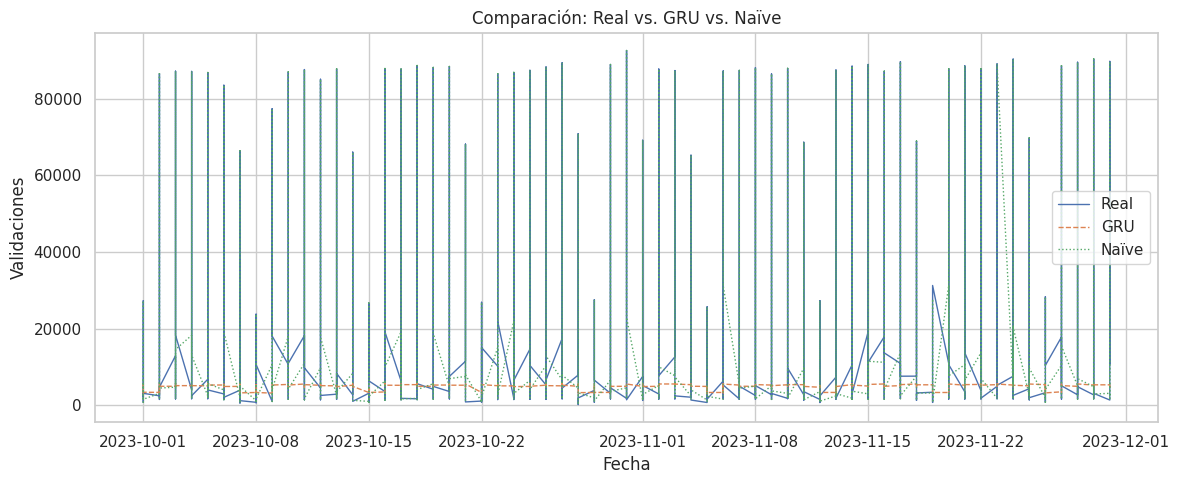

In [121]:
# 1) Vuelve a predecir y desescalar en el scope global
pred = modelo_gru.predict(X_test)
pred_desescalado = scaler_target.inverse_transform(pred)               # shape (N,1)
y_test_desescalado = scaler_target.inverse_transform(y_test.reshape(-1,1))  # shape (N,1)

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# --- 1) Prepara los vectores "verdadero" y "predicción" sin lag ---
# y_test_desescalado: shape (N,1), pred_desescalado: shape (N,1)
y_true = y_test_desescalado.flatten()       # (N,)
y_pred = pred_desescalado.flatten()         # (N,)

# --- 2) Baseline Naïve simple (valor del día anterior) ---
naive_pred   = y_true[:-1]      # del índice 0 a N-2
y_true_cut   = y_true[1:]       # del índice 1 a N-1

# --- 3) Métricas del naïve ---
mae_naive  = mean_absolute_error(y_true_cut, naive_pred)
rmse_naive = np.sqrt(mean_squared_error(y_true_cut, naive_pred))
mape_naive = np.mean(np.abs((y_true_cut - naive_pred) / y_true_cut)) * 100

print(f"Naïve  – MAE: {mae_naive:.2f}, RMSE: {rmse_naive:.2f}, MAPE: {mape_naive:.1f}%")

# --- 4) Métricas de tu modelo ---
mae_model  = mean_absolute_error(y_true, y_pred)
rmse_model = np.sqrt(mean_squared_error(y_true, y_pred))
mape_model = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"GRU    – MAE: {mae_model:.2f}, RMSE: {rmse_model:.2f}, MAPE: {mape_model:.1f}%")

# --- 5) Gráfica comparativa ---
# Prepara eje de fechas compatible con el naïve (se desplaza 1 paso)
fechas_plot = fechas_test.iloc[n_lags+1 :].reset_index(drop=True)

plt.figure(figsize=(12,5))
plt.plot(fechas_plot, y_true_cut,    label="Real",    linewidth=1)
plt.plot(fechas_plot, y_pred[1:],    label="GRU",     linestyle='--', linewidth=1)
plt.plot(fechas_plot, naive_pred,    label="Naïve",   linestyle=':', linewidth=1)
plt.title("Comparación: Real vs. GRU vs. Naïve")
plt.xlabel("Fecha")
plt.ylabel("Validaciones")
plt.legend()
plt.tight_layout()
plt.show()


In [122]:
import pandas as pd
corr = train_df.drop(columns=['target_t1','target_t1_scaled']).corrwith(train_df['target_t1'])
print(corr.sort_values(ascending=False))

anio                         0.108638
año                          0.108638
dia_semana_sin               0.089725
mes                          0.078199
semana_del_anio              0.070322
validaciones_final           0.025185
est_ramon castilla           0.014503
est_balta                    0.014232
est_los jazmines             0.010863
est_honorio delgado          0.009671
est_tomas valle              0.009053
est_quilca                   0.008153
est_28 de julio              0.007949
est_estadio nacional         0.007766
est_aramburu                 0.005934
est_pacifico                 0.005325
est_plaza de flores          0.004894
eventos                      0.004272
est_bulevar                  0.004180
dia                          0.004175
est_ricardo palma            0.003705
est_estadio union            0.003360
est_javier prado             0.003110
mes_cos                      0.002140
est_uni                      0.001875
est_colmena                  0.001697
est_rosario 

In [86]:
# =============================
# Escalar el target (solo con train)
# =============================
scaler_target = MinMaxScaler()
train_df['target_t1_scaled'] = scaler_target.fit_transform(train_df[['target_t1']])
val_df['target_t1_scaled']   = scaler_target.transform(val_df[['target_t1']])
test_df['target_t1_scaled']  = scaler_target.transform(test_df[['target_t1']])

# =============================
# Función para crear ventanas de tiempo
# =============================
def crear_ventanas(df, n_lags, target_col):
    X, y = [], []
    features = df.drop(columns=[target_col]).values
    target = df[target_col].values
    for i in range(n_lags, len(df)):
        X.append(features[i - n_lags:i])
        y.append(target[i])
    return np.array(X), np.array(y)

# Crear ventanas
n_lags = 7  # ventana de 7 días
X_train, y_train = crear_ventanas(train_df, n_lags, 'target_t1_scaled')
X_val, y_val     = crear_ventanas(val_df, n_lags, 'target_t1_scaled')
X_test, y_test   = crear_ventanas(test_df, n_lags, 'target_t1_scaled')

# =============================
# 🔁 Definir modelos LSTM, GRU, RNN con EarlyStopping
# =============================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def construir_modelo_lstm(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(128))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

def construir_modelo_gru(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(GRU(128))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

def construir_modelo_rnn(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(SimpleRNN(128))
    model.add(Dense(1))
    model.compile(optimizer=Adam(0.001), loss='mae')
    return model

# =============================
# 📈 Entrenar y evaluar modelos con EarlyStopping y desescalado
# =============================
def entrenar_y_evaluar(model_func, X_train, y_train, X_val, y_val, X_test, y_test, nombre):
    model = model_func(X_train.shape[1:])
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=50, batch_size=32, callbacks=[early_stop], verbose=0)
    pred = model.predict(X_test)
    pred_desescalado = scaler_target.inverse_transform(pred)
    y_test_desescalado = scaler_target.inverse_transform(y_test.reshape(-1, 1))
    mae = mean_absolute_error(y_test_desescalado, pred_desescalado)
    rmse = np.sqrt(mean_squared_error(y_test_desescalado, pred_desescalado))
    print(f"{nombre} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    return model

# Ejecutar comparaciones
modelo_lstm = entrenar_y_evaluar(construir_modelo_lstm, X_train, y_train, X_val, y_val, X_test, y_test, "LSTM")
modelo_gru  = entrenar_y_evaluar(construir_modelo_gru, X_train, y_train, X_val, y_val, X_test, y_test, "GRU")
modelo_rnn  = entrenar_y_evaluar(construir_modelo_rnn, X_train, y_train, X_val, y_val, X_test, y_test, "RNN")

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
LSTM - MAE: 6120.11, RMSE: 13825.64
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
GRU - MAE: 6117.23, RMSE: 13813.79
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RNN - MAE: 6327.41, RMSE: 14076.75


In [125]:
pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [127]:
import keras_tuner as kt
from keras_tuner import HyperParameters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 0) Definimos un objeto hp global y registramos batch_size ahí
hp = HyperParameters()
hp.Choice("batch_size", [16, 32, 64])

def model_builder(hp):
    model = Sequential()
    model.add(Input(shape=X_train.shape[1:]))

    # 1) Tipo de célula recurrente
    cell_type = hp.Choice("cell_type", ["LSTM", "GRU", "RNN"])

    # 2) Unidades primera capa
    units_1 = hp.Int("units_1", min_value=32, max_value=128, step=32)

    # 3) ¿Devolvemos secuencias para capa apilada?
    return_seq = hp.Boolean("return_sequences")

    # Añade la capa recurrente elegida
    if cell_type == "LSTM":
        model.add(LSTM(units_1, return_sequences=return_seq))
    elif cell_type == "GRU":
        model.add(GRU(units_1, return_sequences=return_seq))
    else:
        model.add(SimpleRNN(units_1, return_sequences=return_seq))

    # 4) Capa recurrente adicional (opcional)
    if return_seq:
        units_2 = hp.Int("units_2", min_value=16, max_value=64, step=16)
        if cell_type == "LSTM":
            model.add(LSTM(units_2))
        elif cell_type == "GRU":
            model.add(GRU(units_2))
        else:
            model.add(SimpleRNN(units_2))

    # 5) Dropout
    model.add(Dropout(hp.Float("dropout", 0.0, 0.5, step=0.1)))

    # 6) Capa de salida
    model.add(Dense(1, activation="linear"))

    # 7) Optimizer & lr
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(optimizer=Adam(learning_rate=lr), loss="mae")

    return model

# 2. Configura el tuner pasando hp como hyperparameters
tuner = kt.RandomSearch(
    model_builder,
    objective="val_loss",
    max_trials=20,
    executions_per_trial=1,
    hyperparameters=hp,           # <— aquí
    allow_new_entries=True,
    directory="tuner_logs",
    project_name="rnn_gru_lstm_tuning"
)

# 3. Ejecuta la búsqueda. Ahora batch_size viene de hp.get(...)
tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=hp.get("batch_size"),  # <— usa hp.get()
    callbacks=[EarlyStopping(monitor="val_loss", patience=5)]
)

# 4. Recupera los mejores hiperparámetros
best_hp = tuner.get_best_hyperparameters(1)[0]
print("Mejores hyperparámetros:", best_hp.values)

# 5. Entrena el mejor modelo final
best_model = tuner.hypermodel.build(best_hp)
best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=best_hp.get("batch_size"),  # guarda el batch óptimo
    callbacks=[EarlyStopping(monitor="val_loss", patience=5)],
    verbose=1
)

# 6. Evalúa en test
pred = best_model.predict(X_test)
pred_des = scaler_target.inverse_transform(pred)
y_test_des = scaler_target.inverse_transform(y_test.reshape(-1,1))

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_des, pred_des)
print(f"Best model MAE en test: {mae:.2f}")


Trial 20 Complete [00h 03m 15s]
val_loss: 0.0654028058052063

Best val_loss So Far: 0.06477860361337662
Total elapsed time: 01h 33m 56s
Mejores hyperparámetros: {'batch_size': 32, 'cell_type': 'GRU', 'units_1': 32, 'return_sequences': True, 'dropout': 0.0, 'lr': 0.00020535161011692922, 'units_2': 64}
Epoch 1/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 0.1362 - val_loss: 0.0672
Epoch 2/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.0529 - val_loss: 0.0655
Epoch 3/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0523 - val_loss: 0.0661
Epoch 4/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0524 - val_loss: 0.0664
Epoch 5/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0525 - val_loss: 0.0653
Epoch 6/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 0.0523 - val_loss: 0.0652
Epoch 7/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.0522 - val_loss: 0.0657
Epoch 8/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.0522 - val_loss: 0

In [128]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 1) Define your model builder as before
def model_builder(hp):
    model = Sequential()
    model.add(Input(shape=X_train.shape[1:]))

    # Tipo de célula recurrente
    cell_type = hp.Choice("cell_type", ["LSTM", "GRU", "RNN"])

    # Unidades primera capa
    units_1 = hp.Int("units_1", min_value=32, max_value=128, step=32)

    # ¿Devolver secuencias para capa apilada?
    return_seq = hp.Boolean("return_sequences")

    if cell_type == "LSTM":
        model.add(LSTM(units_1, return_sequences=return_seq))
    elif cell_type == "GRU":
        model.add(GRU(units_1, return_sequences=return_seq))
    else:
        model.add(SimpleRNN(units_1, return_sequences=return_seq))

    # Capa recurrente adicional (opcional)
    if return_seq:
        units_2 = hp.Int("units_2", min_value=16, max_value=64, step=16)
        if cell_type == "LSTM":
            model.add(LSTM(units_2))
        elif cell_type == "GRU":
            model.add(GRU(units_2))
        else:
            model.add(SimpleRNN(units_2))

    # Dropout
    model.add(Dropout(hp.Float("dropout", 0.0, 0.5, step=0.1)))

    # Salida
    model.add(Dense(1, activation="linear"))

    # Optimizer & learning rate
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(optimizer=Adam(learning_rate=lr), loss="mae")

    return model

# 2) Configura el tuner con Bayesian Optimization
tuner = kt.BayesianOptimization(
    model_builder,
    objective="val_loss",
    max_trials=20,               # ajusta si quieres probar más combinaciones
    directory="tuner_logs",
    project_name="rnn_bayes_opt"
)

# 3) Lanza la búsqueda
tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,               # puedes fijar batch_size o tunearlo por separado
    callbacks=[EarlyStopping(monitor="val_loss", patience=5)]
)

# 4) Obtén los mejores hiperparámetros
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Mejores hyperparámetros:", best_hp.values)

# 5) Construye y entrena el modelo final
best_model = tuner.hypermodel.build(best_hp)
best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,               # o usa best_hp.get("batch_size") si lo hubieras tunedo
    callbacks=[EarlyStopping(monitor="val_loss", patience=5)],
    verbose=1
)

# 6) Evalúa en test
pred = best_model.predict(X_test)
pred_des = scaler_target.inverse_transform(pred)
y_test_des = scaler_target.inverse_transform(y_test.reshape(-1,1))

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae  = mean_absolute_error(y_test_des, pred_des)
mse = mean_squared_error(y_test_des, pred_des)
rmse = np.sqrt(mse)
print(f"Best model (Bayesian) – MAE: {mae:.2f}, RMSE: {rmse:.2f}")


Trial 20 Complete [00h 02m 31s]
val_loss: 0.06477336585521698

Best val_loss So Far: 0.06457442045211792
Total elapsed time: 00h 46m 30s
Mejores hyperparámetros: {'cell_type': 'LSTM', 'units_1': 64, 'return_sequences': True, 'dropout': 0.30000000000000004, 'lr': 0.00016380858201924686, 'units_2': 16}
Epoch 1/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 0.1325 - val_loss: 0.0665
Epoch 2/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0571 - val_loss: 0.0652
Epoch 3/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0525 - val_loss: 0.0650
Epoch 4/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0515 - val_loss: 0.0648
Epoch 5/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0512 - val_loss: 0.0648
Epoch 6/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.0510 - val_loss: 0.0648
Epoch 7/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0509 - val_loss: 0.0648
Epoch 8/50
867/867 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0508 - val_loss: 0

TypeError: got an unexpected keyword argument 'squared'